In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Metadata

   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			   float number in cm
   2. cap-shape (n):             bell=b, conical=c, convex=x, flat=f,
                                 sunken=s, spherical=p, others=o
   3. cap-surface (n):           fibrous=i, grooves=g, scaly=y, smooth=s,
								         shiny=h, leathery=l, silky=k, sticky=t,
								         wrinkled=w, fleshy=e
   4. cap-color (n):             brown=n, buff=b, gray=g, green=r, pink=p,
								         purple=u, red=e, white=w, yellow=y, blue=l, 
								         orange=o,  black=k
   5. does-bruise-bleed (n):	   bruises-or-bleeding=t,no=f
   6. gill-attachment (n):       adnate=a, adnexed=x, decurrent=d, free=e, 
								         sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):          close=c, distant=d, none=f
   8. gill-color (n):            see cap-color + none=f
   9. stem-height (m):			   float number in cm
   10. stem-width (m):			   float number in mm   
   11. stem-root (n):            bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                 rhizomorphs=z, rooted=r
   12. stem-surface (n): 		   see cap-surface + none=f
   13. stem-color (n):			   see cap-color + none=f
   14. veil-type (n):            partial=p, universal=u
   15. veil-color (n):           see cap-color + none=f
   16. has-ring (n):             ring=t, none=f
   17. ring-type (n):            cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							            large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):    see cap color
   19. habitat (n):              grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                 urban=u, waste=w, woods=d
   20. season (n):				   spring=s, summer=u, autumn=a, winter=w

In [8]:
df1 = pd.read_csv('UCLA mushroom/secondary_data.csv', sep=';')

In [9]:
df1

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [12]:
df1.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [13]:
df1.iloc[:, 0].value_counts()

class
p    33888
e    27181
Name: count, dtype: int64

In [68]:
# Working on only non-null data
df2 = df1.copy()
df2 = df2.dropna(axis=1)
df2

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,y,f,f,3.93,6.22,y,f,d,a
61065,p,1.27,f,y,f,f,3.18,5.43,y,f,d,a
61066,p,1.27,s,y,f,f,3.86,6.37,y,f,d,u
61067,p,1.24,f,y,f,f,3.56,5.44,y,f,d,u


In [18]:
df2['class'].groupby(df2['class']).count()

class
e    27181
p    33888
Name: class, dtype: int64

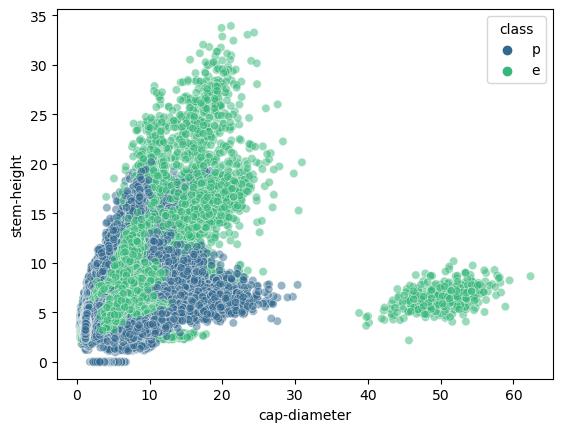

In [25]:
# Scatter plot with cap-diameter and stem height as x and y axis
sns.scatterplot(x='cap-diameter', y='stem-height', data=df2, hue='class', palette='viridis', alpha=0.5)
plt.show()

In [31]:
boolean_columns = [col for col in df2.columns if df2[col].nunique() == 2]

In [32]:
boolean_columns

['class', 'does-bruise-or-bleed', 'has-ring']

<Axes: xlabel='class'>

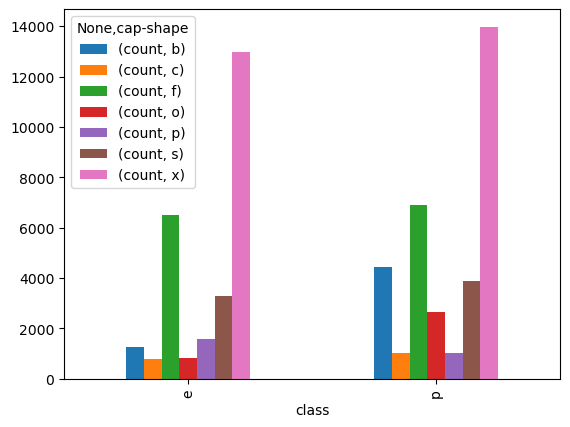

In [43]:
# See how much of each cap shape is in poisonous and edible mushrooms
c = df2['cap-shape'].groupby(df2['class']).value_counts()
pd.DataFrame(c).unstack().plot(kind='bar', stacked=False)
# It is clear that bell shaped and others are more likely to be poisonous

<Axes: xlabel='class'>

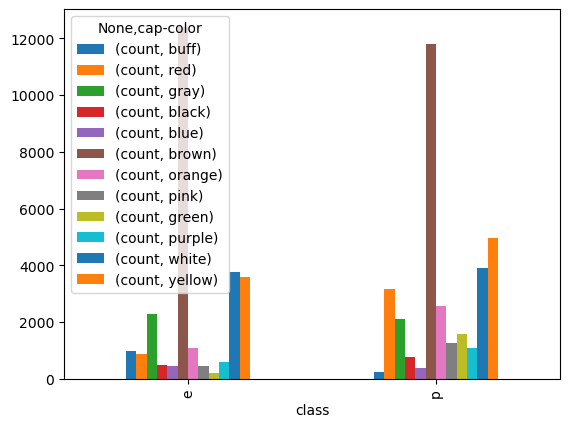

In [48]:
c = df2['cap-color'].groupby(df2['class']).value_counts()
category_dict = {'n': 'brown', 
                 'b': 'buff', 
                 'g': 'gray', 
                 'r': 'green', 
                 'p': 'pink', 
                 'u': 'purple', 
                 'e': 'red', 
                 'w': 'white', 
                 'y': 'yellow', 
                 'o': 'orange', 
                 'l': 'blue',
                 'k': 'black'}
c.index = c.index.set_levels(c.index.levels[1].map(category_dict), level=1)
pd.DataFrame(c).unstack().plot(kind='bar', stacked=False)
# An overwhelming majority of mushrooms are brown, so it is hard to tell if there is a correlation between color and edibility
# Red and yellow mushrooms are more likely to be poisonous
# Green pink and purple mushrooms are more likely to be poisonous

<Axes: xlabel='class'>

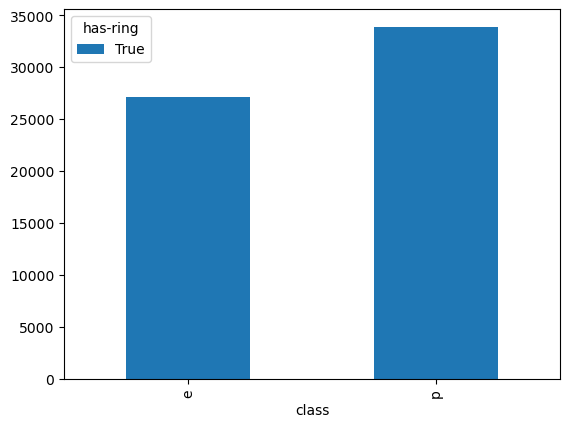

In [52]:
df2['has-ring'].astype(bool).groupby(df2['class']).value_counts().unstack().plot(kind='bar', stacked=False)

In [77]:
from sklearn.metrics import confusion_matrix

# This is unethical but 
# df2['class'] = df2['class'].apply(lambda x: 1 if x == 'p' else 0)
# df2['has-ring'] = df2['has-ring'].apply(lambda x: 1 if x == 't' else 0)
print(confusion_matrix(df2['class'], df2['has-ring']))

[[21180  6001]
 [24710  9178]]
